In [70]:
#Importing necessary packages.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [92]:
#This function "draw_line" draw line.
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1],color='green',linestyle='dashed')

# Incase if Data is imabalanced

<pre>
observing how hyper plane is changs according to change in your learning rate incase of imbalance data.
Here we created 4 datasets (which are linearly separable) in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

0 2
1 20
2 40
3 80


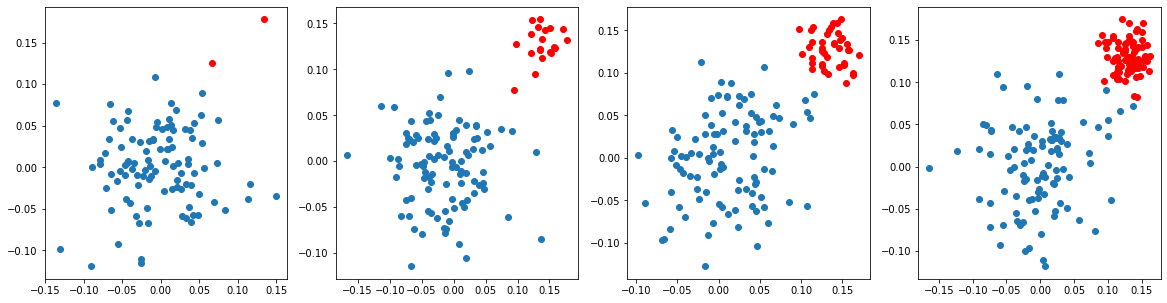

In [72]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    print(j,i[1])
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

In [90]:
#MAKING DATA SAMPLES.
X1_p=np.random.normal(0,0.05,size=(100,2))
X1_n=np.random.normal(0.13,0.02,size=(2,2))
y1_p=np.array([1]*100).reshape(-1,1)
y1_n=np.array([0]*2).reshape(-1,1)
data1_X=np.vstack((X1_p,X1_n))
data1_y=np.vstack((y1_p,y1_n))
y1_min=data1_y.min()-1
y1_max=data1_y.max()+1
###########################################
X2_p=np.random.normal(0,0.05,size=(100,2))
X2_n=np.random.normal(0.13,0.02,size=(20,2))
y2_p=np.array([1]*100).reshape(-1,1)
y2_n=np.array([0]*20).reshape(-1,1)
data2_X=np.vstack((X2_p,X2_n))
data2_y=np.vstack((y2_p,y2_n))
y2_min=data2_y.min()-1
y2_max=data2_y.max()+1
##########################################
X3_p=np.random.normal(0,0.05,size=(100,2))
X3_n=np.random.normal(0.13,0.02,size=(40,2))
y3_p=np.array([1]*100).reshape(-1,1)
y3_n=np.array([0]*40).reshape(-1,1)
data3_X=np.vstack((X3_p,X3_n))
data3_y=np.vstack((y3_p,y3_n))
y3_min=data3_y.min()-1
y3_max=data3_y.max()+1
##########################################
X4_p=np.random.normal(0,0.05,size=(100,2))
X4_n=np.random.normal(0.13,0.02,size=(80,2))
y4_p=np.array([1]*100).reshape(-1,1)
y4_n=np.array([0]*80).reshape(-1,1)
data4_X=np.vstack((X4_p,X4_n))
data4_y=np.vstack((y4_p,y4_n))
y4_min=data4_y.min()-1
y4_max=data4_y.max()+1

> Applying SVM with different regularization strength [0.001, 1, 100]

##  Applying SVM

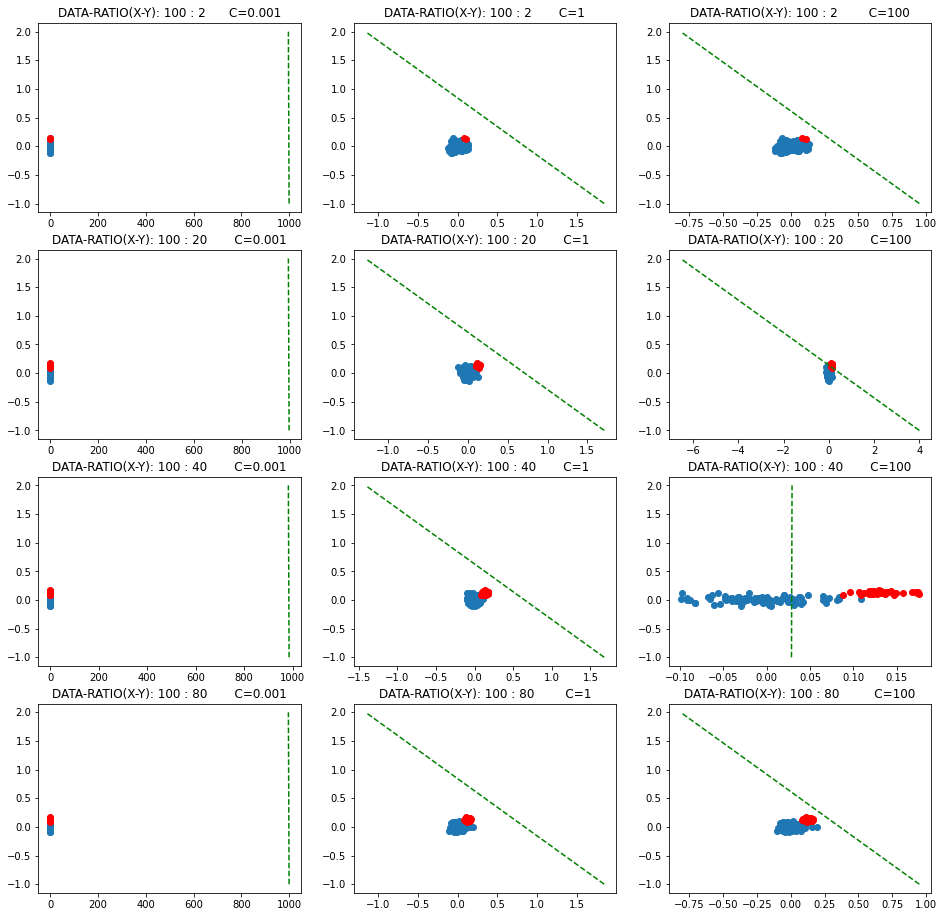

In [104]:
#APPLYING SVM ON THE DATA SAMPLES AND PLOTING THE PLANE.
fig= plt.figure(figsize=(16,16))

plt.subplot(4,3,1)
clf111=svm.SVC(C=0.001)
clf111.fit(data1_X,data1_y)
plt.scatter(X1_p[:,0],X1_p[:,1])
plt.scatter(X1_n[:,0],X1_n[:,1],color='red')
draw_line(clf111.dual_coef_[0],clf111.intercept_[0], y1_min, y1_max)
plt.title("DATA-RATIO(X-Y): 100 : 2      C=0.001")
#####
plt.subplot(4,3,2)
clf112=svm.SVC(C=1)
clf112.fit(data1_X,data1_y)
plt.scatter(X1_p[:,0],X1_p[:,1])
plt.scatter(X1_n[:,0],X1_n[:,1],color='red')
draw_line(clf112.dual_coef_[0],clf112.intercept_[0], y1_min, y1_max)
plt.title("DATA-RATIO(X-Y): 100 : 2       C=1")

#####
plt.subplot(4,3,3)
clf113=svm.SVC(C=100)
clf113.fit(data1_X,data1_y)
plt.scatter(X1_p[:,0],X1_p[:,1])
plt.scatter(X1_n[:,0],X1_n[:,1],color='red')
draw_line(clf113.dual_coef_[0],clf113.intercept_[0], y1_min, y1_max)
plt.title("DATA-RATIO(X-Y): 100 : 2        C=100")

#####
plt.subplot(4,3,4)
clf121=svm.SVC(C=0.001)
clf121.fit(data2_X,data2_y)
plt.scatter(X2_p[:,0],X2_p[:,1])
plt.scatter(X2_n[:,0],X2_n[:,1],color='red')
draw_line(clf121.dual_coef_[0],clf121.intercept_[0], y2_min, y2_max)
plt.title("DATA-RATIO(X-Y): 100 : 20       C=0.001")

#####
plt.subplot(4,3,5)
clf122=svm.SVC(C=1)
clf122.fit(data2_X,data2_y)
plt.scatter(X2_p[:,0],X2_p[:,1])
plt.scatter(X2_n[:,0],X2_n[:,1],color='red')
draw_line(clf122.dual_coef_[0],clf122.intercept_[0], y2_min, y2_max)
plt.title("DATA-RATIO(X-Y): 100 : 20       C=1")

#####
plt.subplot(4,3,6)
clf123=svm.SVC(C=100)
clf123.fit(data2_X,data2_y)
plt.scatter(X2_p[:,0],X2_p[:,1])
plt.scatter(X2_n[:,0],X2_n[:,1],color='red')
draw_line(clf123.dual_coef_[0],clf123.intercept_[0], y2_min, y2_max)
plt.title("DATA-RATIO(X-Y): 100 : 20       C=100")

#####
plt.subplot(4,3,7)
clf131=svm.SVC(C=0.001)
clf131.fit(data3_X,data3_y)
plt.scatter(X3_p[:,0],X3_p[:,1])
plt.scatter(X3_n[:,0],X3_n[:,1],color='red')
draw_line(clf131.dual_coef_[0],clf131.intercept_[0], y3_min, y3_max)
plt.title("DATA-RATIO(X-Y): 100 : 40       C=0.001")

#####
plt.subplot(4,3,8)
clf132=svm.SVC(C=1)
clf132.fit(data3_X,data3_y)
plt.scatter(X3_p[:,0],X3_p[:,1])
plt.scatter(X3_n[:,0],X3_n[:,1],color='red')
draw_line(clf132.dual_coef_[0],clf132.intercept_[0], y3_min, y3_max)
plt.title("DATA-RATIO(X-Y): 100 : 40       C=1")

#####
plt.subplot(4,3,9)
clf133=svm.SVC(C=100)
clf133.fit(data3_X,data3_y)
plt.scatter(X3_p[:,0],X3_p[:,1])
plt.scatter(X3_n[:,0],X3_n[:,1],color='red')
draw_line(clf133.dual_coef_[0],clf133.intercept_[0], y3_min, y3_max)
plt.title("DATA-RATIO(X-Y): 100 : 40       C=100")



####
plt.subplot(4,3,10)
clf141=svm.SVC(C=0.001)
clf141.fit(data1_X,data1_y)
plt.scatter(X4_p[:,0],X4_p[:,1])
plt.scatter(X4_n[:,0],X4_n[:,1],color='red')
draw_line(clf141.dual_coef_[0],clf141.intercept_[0], y4_min, y4_max)
plt.title("DATA-RATIO(X-Y): 100 : 80       C=0.001")


####
plt.subplot(4,3,11)
clf142=svm.SVC(C=1)
clf142.fit(data1_X,data1_y)
plt.scatter(X4_p[:,0],X4_p[:,1])
plt.scatter(X4_n[:,0],X4_n[:,1],color='red')
draw_line(clf142.dual_coef_[0],clf142.intercept_[0], y4_min, y4_max)
plt.title("DATA-RATIO(X-Y): 100 : 80        C=1")


####
plt.subplot(4,3,12)
clf143=svm.SVC(C=100)
clf143.fit(data1_X,data1_y)
plt.scatter(X4_p[:,0],X4_p[:,1])
plt.scatter(X4_n[:,0],X4_n[:,1],color='red')
draw_line(clf143.dual_coef_[0],clf143.intercept_[0], y4_min, y4_max)
plt.title("DATA-RATIO(X-Y): 100 : 80         C=100")


plt.show()

##  Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

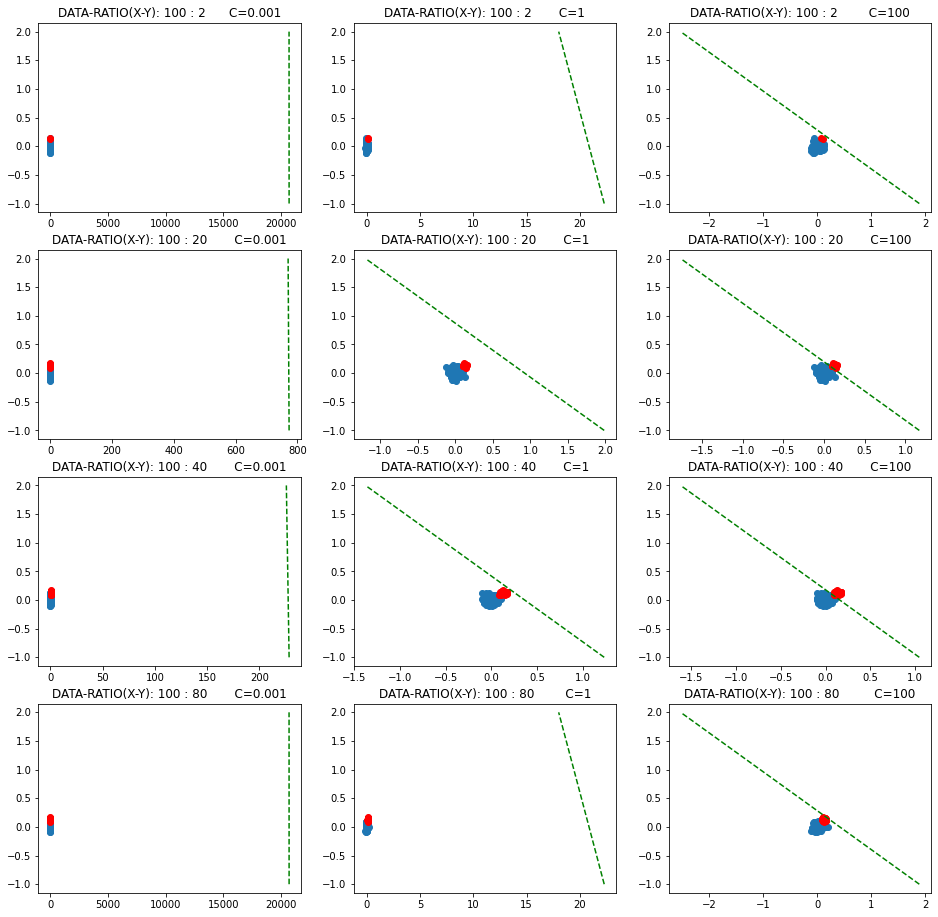

In [106]:
#APPLYING LOGISTICREGRESSION ON THE DATA SAMPLES AND PLOTING THE PLANE.
fig= plt.figure(figsize=(16,16))

plt.subplot(4,3,1)
clf211=LogisticRegression(C=0.001)
clf211.fit(data1_X,data1_y)
plt.scatter(X1_p[:,0],X1_p[:,1])
plt.scatter(X1_n[:,0],X1_n[:,1],color='red')
draw_line(clf211.coef_[0],clf211.intercept_[0], y1_min, y1_max)
plt.title("DATA-RATIO(X-Y): 100 : 2      C=0.001")
#####
plt.subplot(4,3,2)
clf212=LogisticRegression(C=1)
clf212.fit(data1_X,data1_y)
plt.scatter(X1_p[:,0],X1_p[:,1])
plt.scatter(X1_n[:,0],X1_n[:,1],color='red')
draw_line(clf212.coef_[0],clf212.intercept_[0], y1_min, y1_max)
plt.title("DATA-RATIO(X-Y): 100 : 2       C=1")

#####
plt.subplot(4,3,3)
clf213=LogisticRegression(C=100)
clf213.fit(data1_X,data1_y)
plt.scatter(X1_p[:,0],X1_p[:,1])
plt.scatter(X1_n[:,0],X1_n[:,1],color='red')
draw_line(clf213.coef_[0],clf213.intercept_[0], y1_min, y1_max)
plt.title("DATA-RATIO(X-Y): 100 : 2        C=100")

#####
plt.subplot(4,3,4)
clf221=LogisticRegression(C=0.001)
clf221.fit(data2_X,data2_y)
plt.scatter(X2_p[:,0],X2_p[:,1])
plt.scatter(X2_n[:,0],X2_n[:,1],color='red')
draw_line(clf221.coef_[0],clf221.intercept_[0], y2_min, y2_max)
plt.title("DATA-RATIO(X-Y): 100 : 20       C=0.001")

#####
plt.subplot(4,3,5)
clf222=LogisticRegression(C=1)
clf222.fit(data2_X,data2_y)
plt.scatter(X2_p[:,0],X2_p[:,1])
plt.scatter(X2_n[:,0],X2_n[:,1],color='red')
draw_line(clf222.coef_[0],clf222.intercept_[0], y2_min, y2_max)
plt.title("DATA-RATIO(X-Y): 100 : 20       C=1")

#####
plt.subplot(4,3,6)
clf223=LogisticRegression(C=100)
clf223.fit(data2_X,data2_y)
plt.scatter(X2_p[:,0],X2_p[:,1])
plt.scatter(X2_n[:,0],X2_n[:,1],color='red')
draw_line(clf223.coef_[0],clf223.intercept_[0], y2_min, y2_max)
plt.title("DATA-RATIO(X-Y): 100 : 20       C=100")

#####
plt.subplot(4,3,7)
clf231=LogisticRegression(C=0.001)
clf231.fit(data3_X,data3_y)
plt.scatter(X3_p[:,0],X3_p[:,1])
plt.scatter(X3_n[:,0],X3_n[:,1],color='red')
draw_line(clf231.coef_[0],clf231.intercept_[0], y3_min, y3_max)
plt.title("DATA-RATIO(X-Y): 100 : 40       C=0.001")

#####
plt.subplot(4,3,8)
clf232=LogisticRegression(C=1)
clf232.fit(data3_X,data3_y)
plt.scatter(X3_p[:,0],X3_p[:,1])
plt.scatter(X3_n[:,0],X3_n[:,1],color='red')
draw_line(clf232.coef_[0],clf232.intercept_[0], y3_min, y3_max)
plt.title("DATA-RATIO(X-Y): 100 : 40       C=1")

#####
plt.subplot(4,3,9)
clf233=LogisticRegression(C=100)
clf233.fit(data3_X,data3_y)
plt.scatter(X3_p[:,0],X3_p[:,1])
plt.scatter(X3_n[:,0],X3_n[:,1],color='red')
draw_line(clf233.coef_[0],clf233.intercept_[0], y3_min, y3_max)
plt.title("DATA-RATIO(X-Y): 100 : 40       C=100")



####
plt.subplot(4,3,10)
clf241=LogisticRegression(C=0.001)
clf241.fit(data1_X,data1_y)
plt.scatter(X4_p[:,0],X4_p[:,1])
plt.scatter(X4_n[:,0],X4_n[:,1],color='red')
draw_line(clf241.coef_[0],clf241.intercept_[0], y4_min, y4_max)
plt.title("DATA-RATIO(X-Y): 100 : 80       C=0.001")


####
plt.subplot(4,3,11)
clf242=LogisticRegression(C=1)
clf242.fit(data1_X,data1_y)
plt.scatter(X4_p[:,0],X4_p[:,1])
plt.scatter(X4_n[:,0],X4_n[:,1],color='red')
draw_line(clf242.coef_[0],clf242.intercept_[0], y4_min, y4_max)
plt.title("DATA-RATIO(X-Y): 100 : 80        C=1")


####
plt.subplot(4,3,12)
clf243=LogisticRegression(C=100)
clf243.fit(data1_X,data1_y)
plt.scatter(X4_p[:,0],X4_p[:,1])
plt.scatter(X4_n[:,0],X4_n[:,1],color='red')
draw_line(clf243.coef_[0],clf243.intercept_[0], y4_min, y4_max)
plt.title("DATA-RATIO(X-Y): 100 : 80         C=100")


plt.show()

###**OBSERVATION**:

##observations(for svm models)
######1.model is highly affected by data imbalance.
######2.when regularization parameter is 0.001 the hyperpalne is far away from data samples.
######3.when regularization parameter is 1 the plane tries to fit data(deviates towards the data).
######4.when the regularization parameter is 100 the plane fits the data almost and model tries to work better when the data ratio is 100-20,100-40. even the regularization parameter is 100 the model is affected by data imbalance when the data ratios is 100-2,100-80.

##observations(for logisticregression)
######1.model is almost affected by data imbalance.
######2.when regularization parameter is 0.001 the hyperpalne is far away from data samples.
######3.when regularization parameter is 1 the model tries to fit the data(deviates towards the data) ,when the data ratio is 100:40 the plane almost tries to fit the data
######4.even in the case of data imbalance when resularization parameter is set to 100 model(logistic regression) performs a decent job , when the data ratio is 100:40,100:80 the model performs good compared to all other (including svm).